# Make plot for slides focused on surface rotation rate
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [2]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plot_defaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *


Hardcoded some constants


In [3]:
set_plot_defaults()

done reading matplotlibrc


In [4]:
# root folder for best model
folder = "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/" #
binary = folder+"binary_to_postRLOF/"# "/binary_to_donor_Hedepl/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/exponential_ov/"
# binary = folder+"binary_to_postRLOF/"
# dhfile = binary+"/LOGS1/history.data"
# hfile1 = binary+'/LOGS2/history.data'
LOGS2 = binary+'/LOGS2/'

re-run\_exponential


/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


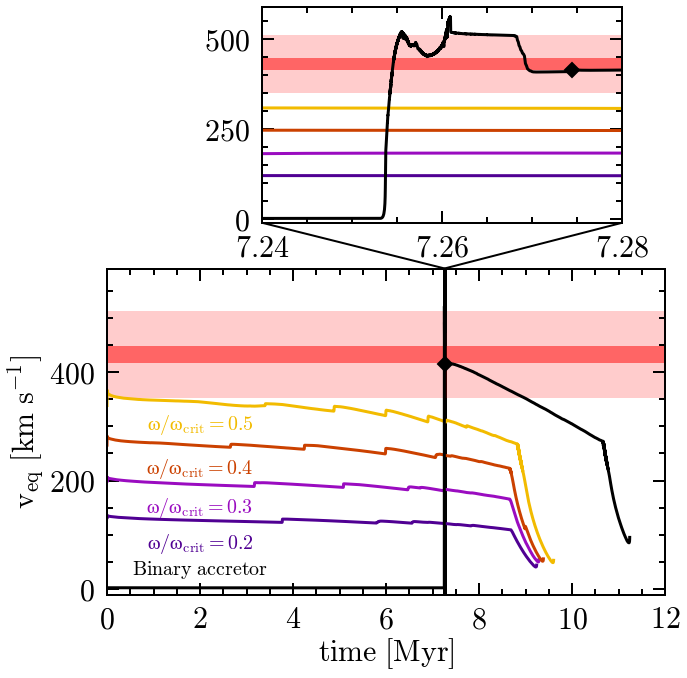

In [77]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:60,:])
zx = inset_axes(ax, 5, 3, bbox_to_anchor=(0.95,1.85), bbox_transform=ax.transAxes)

# overplot single rotating stars
folders = [
    "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/"]
colors = plt.cm.gnuplot(np.linspace(0.1,0.9,len(folders)))
for f in folders:
    t, v = get_surface_rotation_time(f+'/history.data')
    src, col = getSrcCol(f+'history.data')
    # print(col)
    omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]   
    c = colors[folders.index(f)]
    ax.plot(t, v, c=c, zorder=2)
    zx.plot(t, v, c=c, zorder=2)
    ax.text(2, v[np.argmin(np.absolute(t-2))]-20,
            "$\omega/\omega_\mathrm{crit}="+str(f.split('/')[-3].split('_')[1])+"$",
            va="top", ha="center", color=c, fontsize=20) #, bbox=dict(facecolor='w', edgecolor=c, boxstyle='round,pad=0'))


plot_surface_rotation_time(ax, hfile1, c='k', hfile2=hfile2) #, label="Z=0.01")
plot_surface_rotation_time(zx, hfile1, c='k', hfile2=hfile2)
    
# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()

ax.set_xlim(0,12)
xmin, xmax = ax.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-5*err_vsini], [vsini+5*err_vsini], facecolor='r', alpha=0.2, zorder=1)
zx.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
zx.fill_between(np.linspace(xmin, xmax,2), [vsini-5*err_vsini], [vsini+5*err_vsini], facecolor='r', alpha=0.2, zorder=1)

ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
ax.set_ylim(ymin=-10)

# ax.set_xlim(xmin=8)
# ax.set_ylim(ymin=200)
ax.set_ylabel(r"$v_\mathrm{eq} \ \mathrm{[km\ s^{-1}]}$")
# zx.set_ylabel(r"$v_\mathrm{eq} \ \mathrm{[km\ s^{-1}]}$")
ax.text(2, 15, r"$\mathrm{Binary\ accretor}$", fontsize=20, c='k', va="bottom", ha="center")
# fig.align_labels()
zx.set_xlim(xmax=7.28, xmin=7.24)
zx.set_ylim(ax.get_ylim())
my_mark_inset(ax, zx, loc1a=3, loc2a=4, loc1b=1, loc2b=2, fc="none",lw=2, ec="k",zorder=0)
plt.savefig('/mnt/home/mrenzo/TMP/rot_surf_acc_inset.pdf')

/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


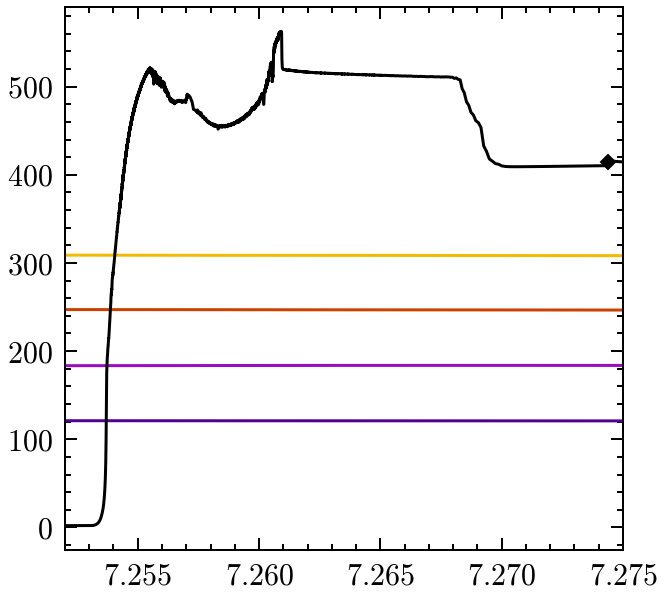

In [27]:
# test zoomed version
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

# overplot single rotating stars
folders = [
    "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/ceph/RESULTS/zeta_oph/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/"]
colors = plt.cm.gnuplot(np.linspace(0.1,0.9,len(folders)))
for f in folders:
    t, v = get_surface_rotation_time(f+'/history.data')
    src, col = getSrcCol(f+'history.data')
    c = colors[folders.index(f)]
    ax.plot(t, v, c=c, zorder=2)
    # ax.text(2, v[np.argmin(np.absolute(t-2))]-20,
    #         "$\omega/\omega_\mathrm{crit}="+str(f.split('/')[-3].split('_')[1])+"$",
    #         va="top", ha="center", color=c, fontsize=20) #, bbox=dict(facecolor='w', edgecolor=c, boxstyle='round,pad=0'))

ax.set_xlim(xmax=7.275, xmin=7.252)
plot_surface_rotation_time(ax, hfile1, c='k', hfile2=hfile2) #, label="Z=0.01")

    
# overplot observational range
# vsini, err_vsini = get_zeta_oph_vsini()

# xmin, xmax = ax.get_xlim()

# ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
# ax.fill_between(np.linspace(xmin, xmax,2), [vsini-5*err_vsini], [vsini+5*err_vsini], facecolor='r', alpha=0.2, zorder=1)
# # ax.legend(loc="center right", fontsize=30)
# ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
# ax.set_xticklabels([])

# ax.set_ylim(ymin=-10)

# # ax.set_xlim(xmin=8)
# # ax.set_ylim(ymin=200)
# ax.set_ylabel(r"$v_\mathrm{eq} \ \mathrm{[km\ s^{-1}]}$")

# ax.text(2, 15, r"$\mathrm{Binary\ accretor}$", fontsize=20, c='k', va="bottom", ha="center")
# fig.align_labels()
